# Jagdeep Singh - Fitting Data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import QTable

from scipy.optimize import curve_fit

# Power on the Moon

<img src="images/ApolloRTG.jpg" alt="Apollo_ALSEP_RTG" style="width: 500px;"/>

The Apollo lunar mission deployed a series of experiments on the Moon, The experiment package
was called the Apollo Lunar Surface Experiments Package (ALSEP). The ALSEP was powered by a radioisotope 
thermoelectric generator (RTG). 

An RTG is basically a fist-sized
slug of Pu-238 wrapped in a material that generates electric power when heated. Since the RTG is powered
by a radioisotope, the output power decreases over time as the radioisotope decays.

## Read in the datafile

The data file `Apollo_RTG.csv` contains the power output of the Apollo 12 RTG as a function of time.

The data colunms are

* [Day] - Days on the Moon
* [Power] - RTG power output in Watts

In [3]:
power = QTable.read('Apollo_RTG.csv', format='ascii.csv')
X = power['Day']
Y = power['Power']

## Can you charge your phone with the Apollo RTG?

* Plot the data: Day vs. Power
* Use the OO interface to matplotlib
* Fit the function with a polynomial (you choose the degree).
* Plot the fit with the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

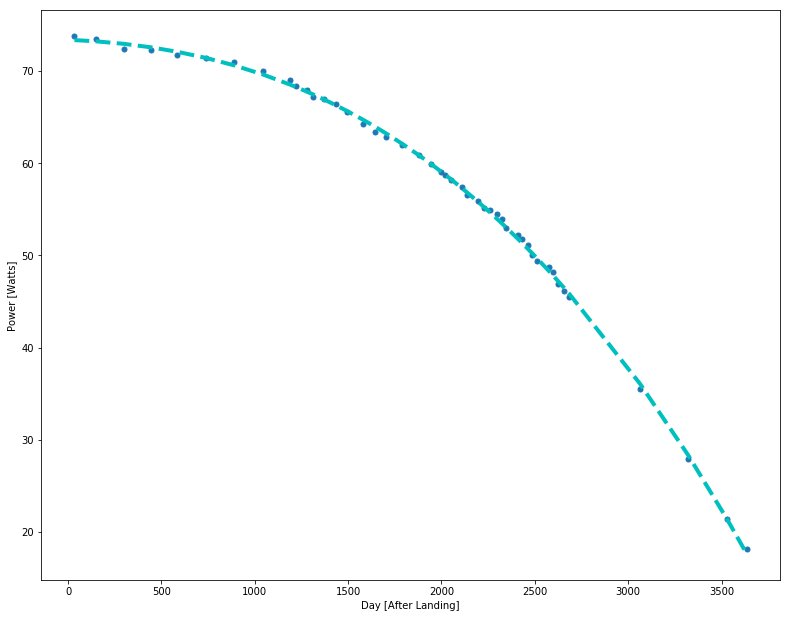

In [4]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11, 8.5)

fig.tight_layout()

ax.set_xlabel("Day [After Landing]")
ax.set_ylabel("Power [Watts]")

ax.plot(X, Y, marker="o", linestyle="None", markersize=5);

Fit1 = np.polyfit(X, Y, 3)
Yfit = np.polyval(Fit1, X)

ax.plot(X, Yfit, linewidth=4, color='c', linestyle='--');

## What was the power output on Day 0?

In [5]:
poly02 = np.poly1d(Fit1)
output = poly02(0)
print("{0:.2f} Watts".format(output))

73.40 Watts


## How many years after landing could you still power a 60 W lightbulb?

In [8]:
num_days = (poly02 - 60).roots[2].real
years = num_days / 365
print("{0:.2f} years after the landing.".format(years))

5.31 years after the landing.


## How many years after landing could you still power a 5 W USB device?

In [9]:
num_days = (poly02 - 5).roots[2].real
years = num_days / 365
print("{0:.2f} years after the landing.".format(years))

10.85 years after the landing.


## How many years after landing until the power output is 0 W?

In [10]:
num_days = poly02.roots[2].real
years = num_days / 365
print("{0:.2f} years after the landing.".format(years))

11.17 years after the landing.


---

# Fitting data to a function

* The datafile 'FitMe.dat' contains two columns of data (x,y)
* Use the OO interface to matplotlib
* Plot the data x,y
* Fit the function below to the data
* Find the values of a,b,c that best fit the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

$$\Large f(x) = a \sin(bx) \ e^{-cx} $$

[ 2.5335425   4.11112401  0.34632264]


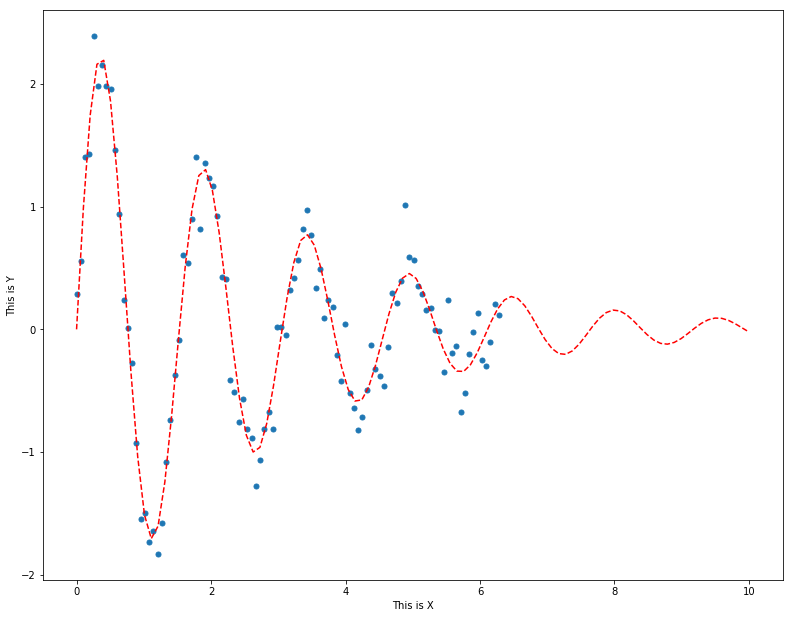

In [11]:
fit_data = QTable.read('FitMe.csv', format='ascii.csv')
X1 = fit_data['x']
Y1 = fit_data['y']

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11, 8.5)

fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(X1, Y1, marker="o", linestyle="None", markersize=5);


def func(x,a,b,c):
    return a*np.sin(b*x)*np.exp(-c*x)

fitpars, error = curve_fit(func, X1, Y1, p0=[1,1,1])

print(fitpars)

Z = np.linspace(0,10,100)
ax.plot(Z, func(Z, *fitpars), 'r--');

### Due Tue Nov 07 - 5pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  